In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD
import cv2

In [2]:
!wget https://www.dropbox.com/s/va90dnmndh0x8el/28577_36420_bundle_archive.zip

--2021-04-15 05:06:30--  https://www.dropbox.com/s/va90dnmndh0x8el/28577_36420_bundle_archive.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/va90dnmndh0x8el/28577_36420_bundle_archive.zip [following]
--2021-04-15 05:06:30--  https://www.dropbox.com/s/raw/va90dnmndh0x8el/28577_36420_bundle_archive.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb962ab0c4fd7680c913aad99a1.dl.dropboxusercontent.com/cd/0/inline/BMrJ_aF9RQ4eLPpCumsuyEdEwxkIbDx7n3vHQZyACyB4JtSbOmbXJAZjbL7Q7iAIRND_HL8OWRiIHkZ-Hsm2wi034l8lRgjzAqpMm8Voqd2rh1P4PNXSUorkaxcpz2_Ji02ePDwq9wGFq4pt2nsxf4Ig/file# [following]
--2021-04-15 05:06:31--  https://ucb962ab0c4fd7680c913aad99a1.dl.dropboxusercontent.com/cd/0/inline/BMrJ_aF9RQ4eLPpCumsuyEdEwxkIbDx7n3vH

In [3]:
!unzip 28577_36420_bundle_archive.zip

Archive:  28577_36420_bundle_archive.zip
  inflating: fer2013.csv             


In [4]:
X_train,train_y,X_test,test_y=[],[],[],[]

In [5]:
df = pd.read_csv('/content/fer2013.csv')

In [6]:
for index, row in df.iterrows():
  val=row['pixels'].split(" ")
  try:
      if 'Training' in row['Usage']:
         X_train.append(np.array(val,'float32'))
         train_y.append(row['emotion'])
      elif 'PublicTest' in row['Usage']:
         X_test.append(np.array(val,'float32'))
         test_y.append(row['emotion'])
  except:
    print(f"error occured at index :{index} and row:{row}")


In [7]:
num_features = 64
num_labels = 7
batch_size = 64
epochs = 50
width, height = 48, 48

In [8]:
X_train = np.array(X_train,'float32')
train_y = np.array(train_y,'float32')
X_test = np.array(X_test,'float32')
test_y = np.array(test_y,'float32')

In [9]:
from keras.utils.np_utils import to_categorical

In [10]:
train_y=to_categorical(train_y, num_classes=num_labels)
test_y=to_categorical(test_y, num_classes=num_labels)

In [11]:
X_train -= np.mean(X_train, axis=0)
X_train /= np.std(X_train, axis=0)

X_test -= np.mean(X_test, axis=0)
X_test /= np.std(X_test, axis=0)

X_train = X_train.reshape(X_train.shape[0], 48, 48, 1)
X_test = X_test.reshape(X_test.shape[0], 48, 48, 1)


In [13]:
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPool2D, Activation
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras import layers
from tensorflow import keras

In [14]:
model = Sequential()

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(X_train.shape[1:])))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))

model.add(Flatten())

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(num_labels, activation='softmax'))

model.summary()




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 44, 44, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 22, 22, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 64)        36928     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 18, 18, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 9, 9, 64)         

In [15]:
model.compile(loss=categorical_crossentropy,
              optimizer='sgd',
              metrics=['accuracy'])

In [16]:
model.fit(X_train, train_y,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, test_y),
          shuffle=True)


Epoch 1/50
449/449 [==============================] - 42s 19ms/step - loss: 1.8530 - accuracy: 0.2416 - val_loss: 1.8210 - val_accuracy: 0.2502
Epoch 2/50
449/449 [==============================] - 8s 18ms/step - loss: 1.8023 - accuracy: 0.2506 - val_loss: 1.7979 - val_accuracy: 0.2510
Epoch 3/50
449/449 [==============================] - 8s 18ms/step - loss: 1.7821 - accuracy: 0.2568 - val_loss: 1.7867 - val_accuracy: 0.2519
Epoch 4/50
449/449 [==============================] - 8s 18ms/step - loss: 1.7702 - accuracy: 0.2576 - val_loss: 1.7765 - val_accuracy: 0.2627
Epoch 5/50
449/449 [==============================] - 8s 18ms/step - loss: 1.7606 - accuracy: 0.2774 - val_loss: 1.7506 - val_accuracy: 0.2862
Epoch 6/50
449/449 [==============================] - 8s 18ms/step - loss: 1.7280 - accuracy: 0.3002 - val_loss: 1.7135 - val_accuracy: 0.2976
Epoch 7/50
449/449 [==============================] - 8s 18ms/step - loss: 1.7001 - accuracy: 0.3166 - val_loss: 1.6717 - val_accuracy: 0.324

In [17]:
fer_json = model.to_json()
with open("fer.json", "w") as json_file:
  json_file.write(fer_json)
model.save_weights("fer.h5")  

In [18]:
import os
import cv2
import numpy as np
from keras.models import model_from_json
from keras.preprocessing import image

In [71]:
model = model_from_json(open("fer.json", "r").read())
model.load_weights('fer.h5')
face_haar_cascade = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')

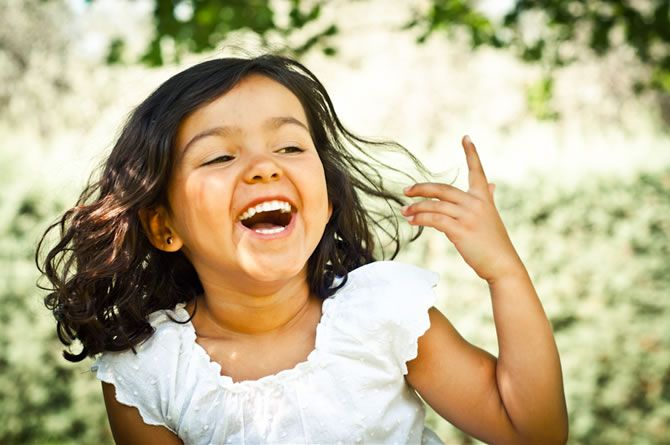

In [72]:
from google.colab.patches import cv2_imshow
import cv2
test_image = cv2.imread('/content/happy.jpg')
cv2_imshow(test_image)


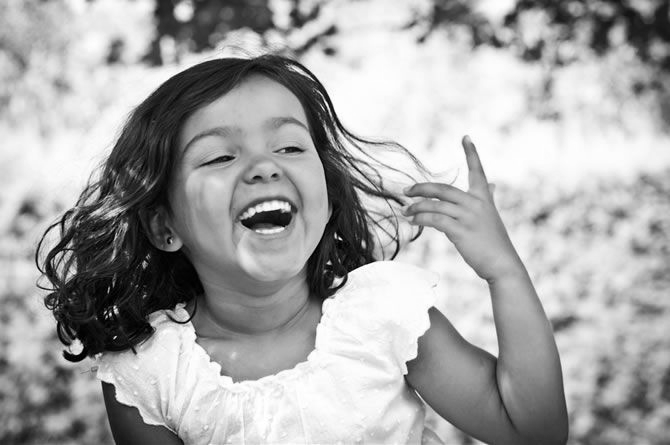

In [73]:
gray_image = cv2.cvtColor(test_image, cv2.COLOR_RGB2GRAY)
cv2_imshow(gray_image)

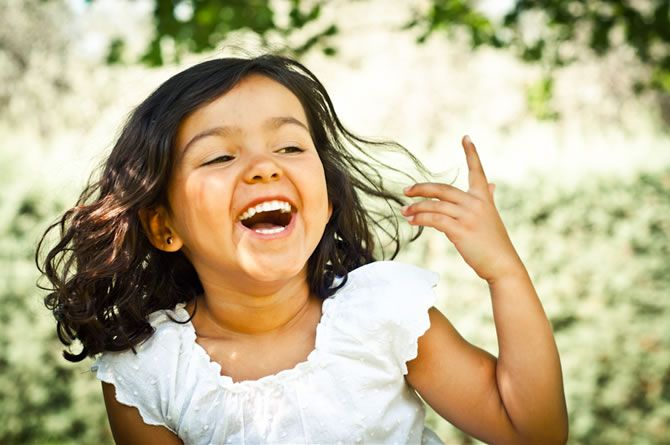

In [74]:
face_cascade=cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')
from keras.preprocessing.image import img_to_array
cv2_imshow(test_image)

happy


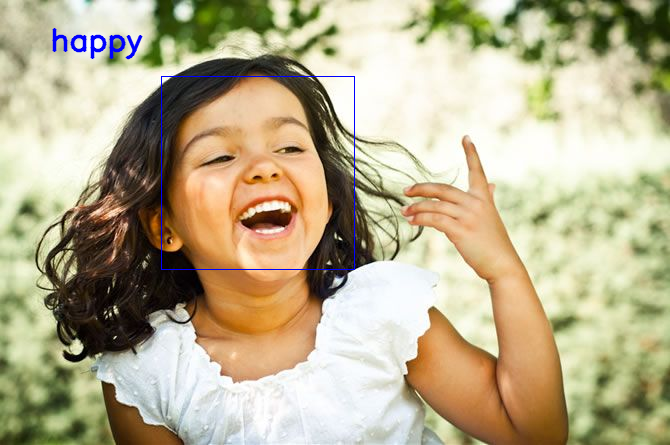

In [75]:

faces = face_cascade.detectMultiScale(gray_image, 1.1, 4)

#Draw rectangle around the faces
for (x,y,w,h) in faces:
    cv2.rectangle(test_image,(x,y),(x+w,y+h),(255,0,0))
    roi_gray=gray_image[y:y+w,x:x+h]
    roi_gray=cv2.resize(roi_gray,(48,48))
    image_pixels=img_to_array(roi_gray)
    image_pixels=np.expand_dims(image_pixels,axis=0)
    image_pixels/=255
    predictions=model.predict(image_pixels)
    max_index=np.argmax(predictions[0])
    emotion_detection=('angry','disgust','fear','happy','sad','surprise','neutral')
    emotion_prediction=emotion_detection[max_index]
    #cv2.putText(resize_image,emotion_prediction,(int(x),int(y)))
    print(emotion_prediction)
    #resize_image=cv2.resize(test_image,(1000,700))
    #cv2_imshow(resize_image)
    font=cv2.FONT_HERSHEY_SIMPLEX
    org=(50,50)
    fontScale=1
    color=(255,0,0)
    thickness=2
    image=cv2.putText(test_image,emotion_prediction,org,font,fontScale,color,thickness,cv2.LINE_AA)
    cv2_imshow(image)
